In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing

In [68]:
df = pd.read_csv('/uber.csv')

In [69]:
df.info

<bound method DataFrame.info of        Unnamed: 0                            key  fare_amount  \
0        24238194    2015-05-07 19:52:06.0000003          7.5   
1        27835199    2009-07-17 20:04:56.0000002          7.7   
2        44984355   2009-08-24 21:45:00.00000061         12.9   
3        25894730    2009-06-26 08:22:21.0000001          5.3   
4        17610152  2014-08-28 17:47:00.000000188         16.0   
...           ...                            ...          ...   
26777    48842341    2013-10-18 01:54:00.0000004         24.5   
26778    23885183    2011-09-26 07:56:59.0000001          6.5   
26779    39750186   2009-04-21 08:31:00.00000025          8.9   
26780    13899259    2015-04-22 00:33:27.0000002         12.5   
26781    44731446    2015-02-19 06:40:51.0000005          7.0   

               pickup_datetime  pickup_longitude  pickup_latitude  \
0      2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1      2009-07-17 20:04:56 UTC        -73.994355 

In [70]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [71]:
df.shape

(26782, 9)

## Cleaning

In [72]:
df = df.drop(['Unnamed: 0', 'key'], axis=1)

In [73]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      1
dtype: int64

In [74]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace = True)

In [75]:
df.dropna(axis=0,inplace=True)

In [76]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

## Fix data type of pickup_datetime from Object to DateTime

In [77]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                  float64
dtype: object

In [78]:
# extracting time feature from 'pickup_datetime'

In [79]:
df = df.assign(hour = df.pickup_datetime.dt.hour,
               day = df.pickup_datetime.dt.day,
               month = df.pickup_datetime.dt.month,
               year = df.pickup_datetime.dt.year,
               dayofweek = df.pickup_datetime.dt.dayofweek)

In [80]:
df = df.drop(["pickup_datetime"], axis =1)
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...
26776,4.5,-73.987007,40.745440,-73.980320,40.748597,1.0,16,7,9,2010,1
26777,24.5,-73.987893,40.744102,-73.981747,40.666842,1.0,1,18,10,2013,4
26778,6.5,-73.992994,40.742853,-73.973609,40.738749,1.0,7,26,9,2011,0
26779,8.9,-73.982207,40.770703,-74.003693,40.743873,5.0,8,21,4,2009,1


# Harvesine Distance formula
Distance = 2 * asin(sqrt(a)) * radius <br>
a = sin²(ΔlatDifference/2) + cos(lat1).cos(lt2).sin²(ΔlonDifference/2)

In [81]:
# calculate travel distance from latitudes and longitudes
from math import *

def distance_formula(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []

    for pos in range (len(longitude1)):
        lon1, lan1, lon2, lan2 = map(radians, [longitude1[pos], latitude1[pos], longitude2[pos], latitude2[pos]])
        dist_lon = lon2 - lon1
        dist_lan = lan2 - lan1

        a = sin(dist_lan/2)**2 + cos(lan1) * cos(lan2) * sin(dist_lon/2)**2

        #radius of earth = 6371
        c = 2 * asin(sqrt(a)) * 6371
        travel_dist.append(c)

    return  travel_dist

In [82]:
df['dist_travel_km'] = distance_formula(df.pickup_longitude.to_numpy(), df.pickup_latitude.to_numpy(), df.dropoff_longitude.to_numpy(), df.dropoff_latitude.to_numpy())

In [83]:
#2. Identify and removing outliers

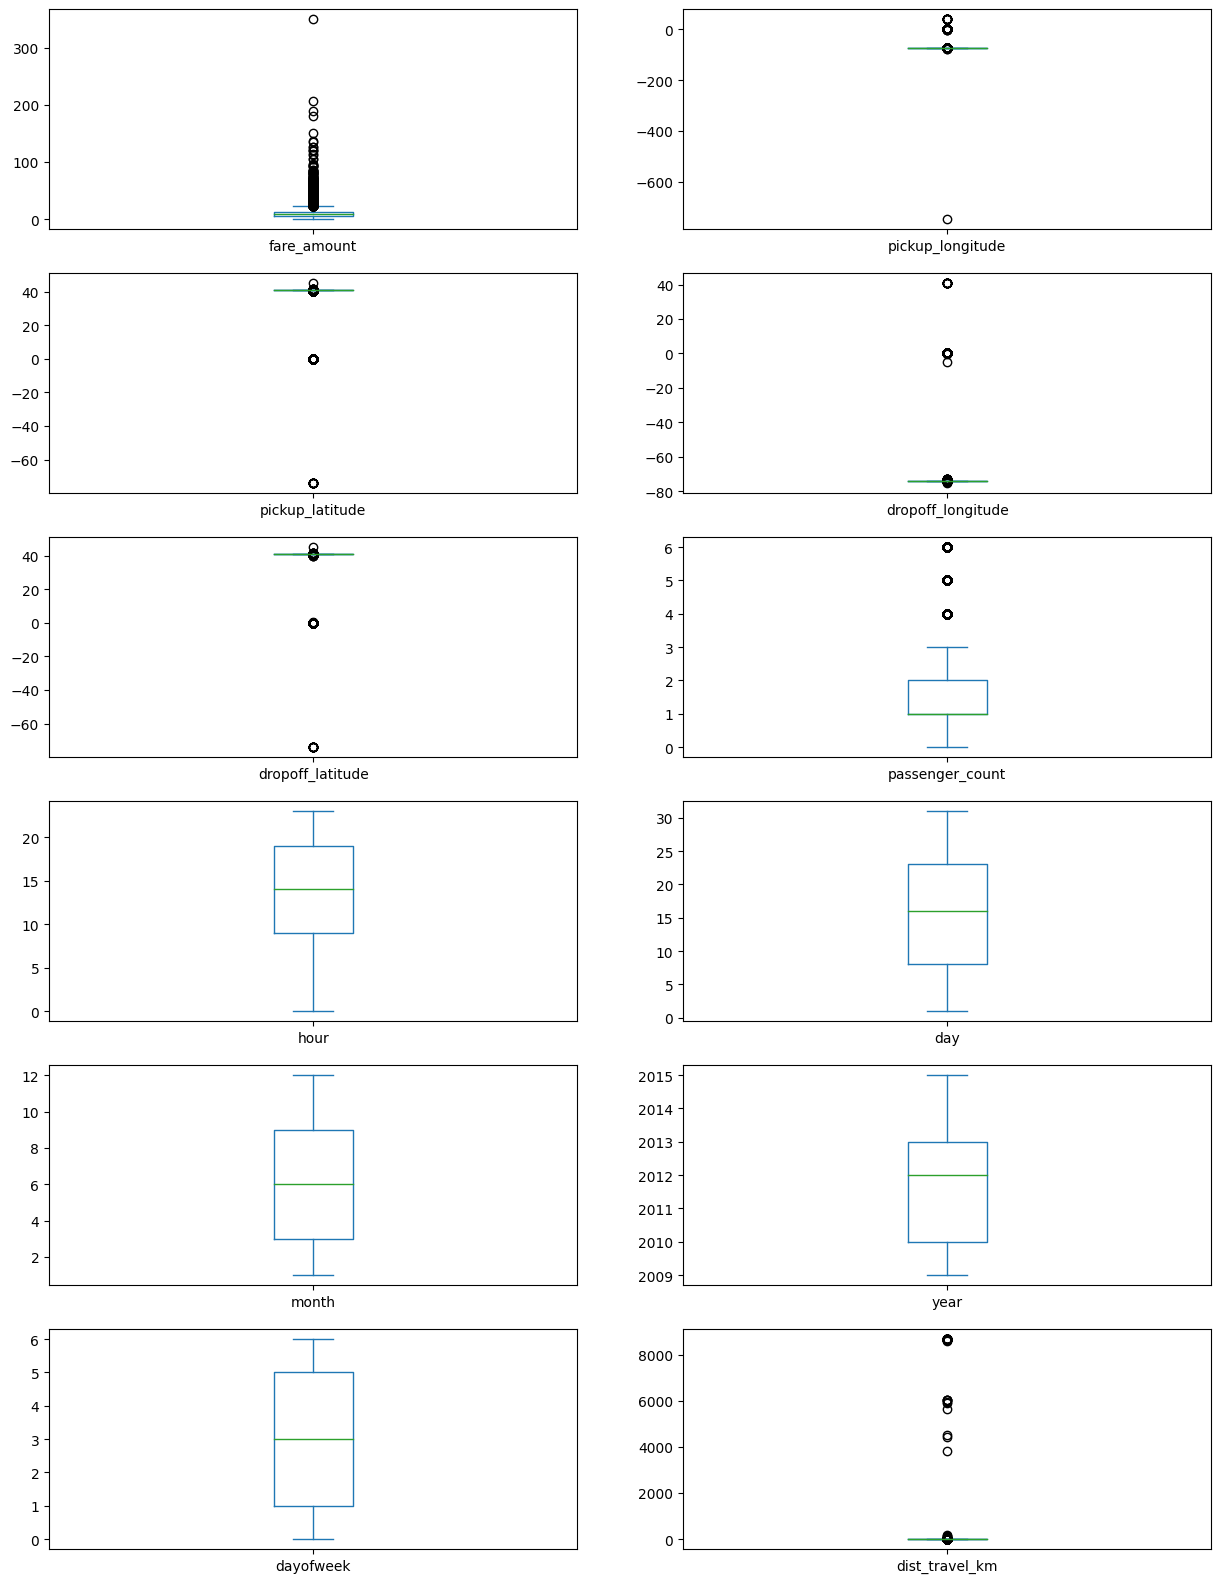

In [84]:
df.plot(kind = "box",subplots = True,layout = (6,2),figsize=(15,20))
plt.show()

In [85]:
#IQR to remove outliers
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

In [86]:
df = treat_outliers_all(df , df.iloc[: , 0::])

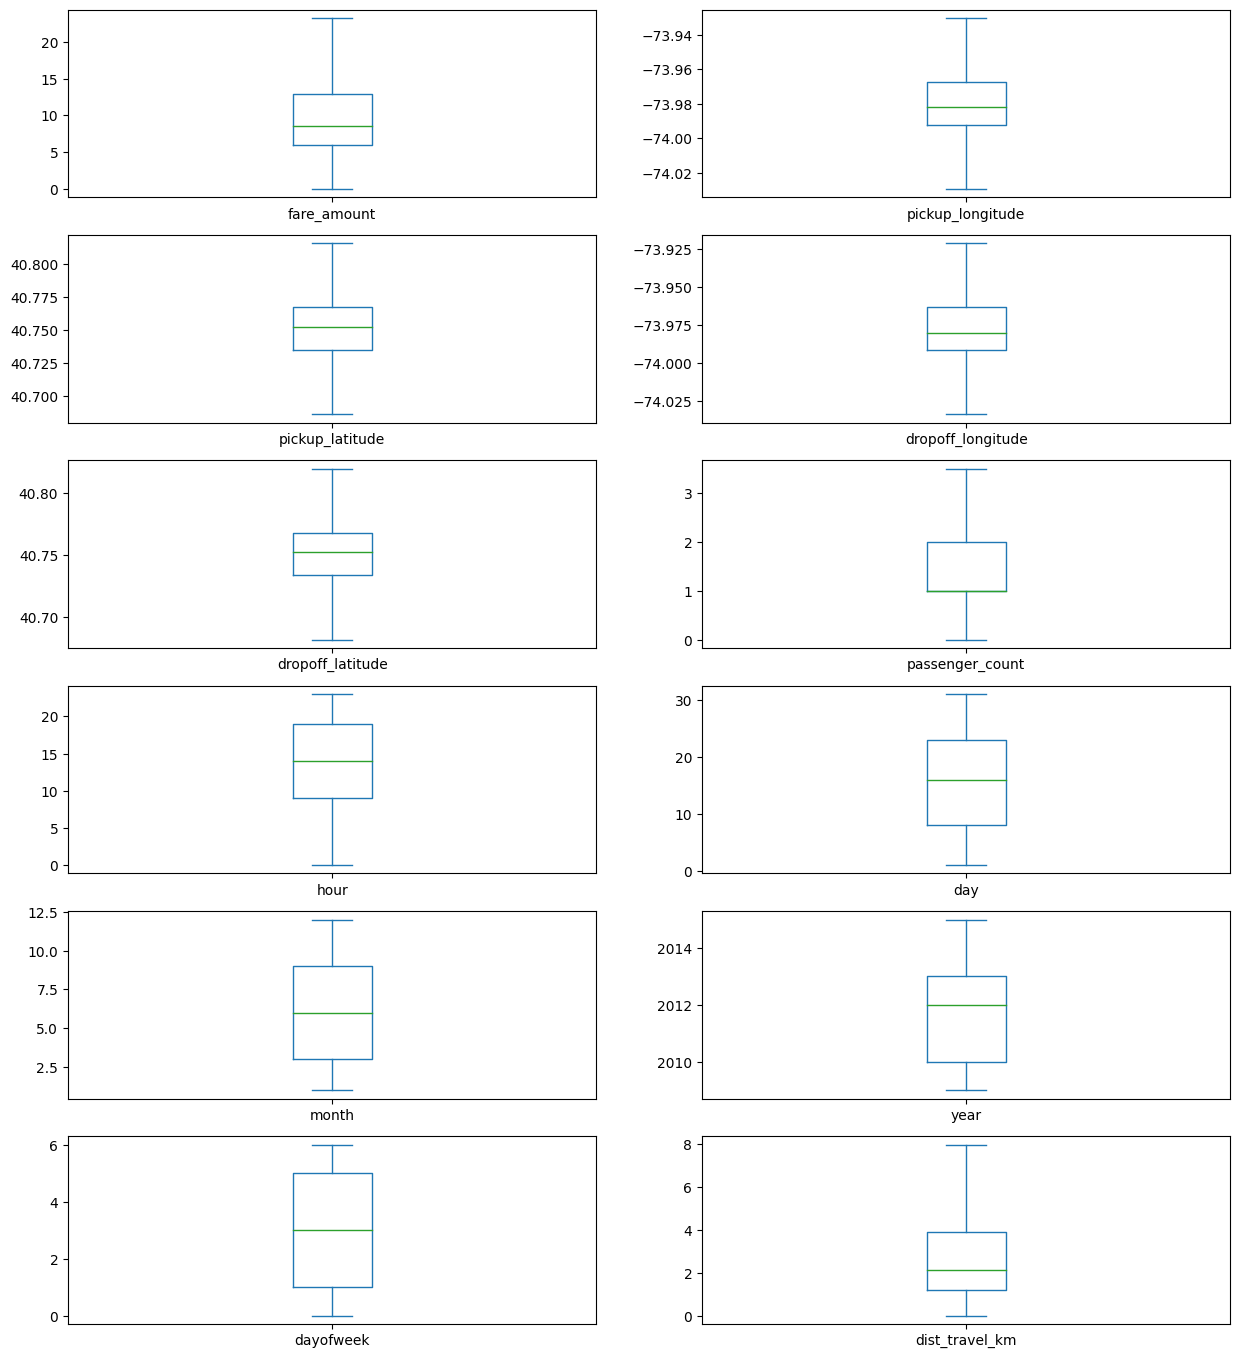

In [87]:
#Checking if outlier is still present or not
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))
plt.show()

In [88]:
#3. Corretlation

In [89]:
corr = df.corr()
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.160304,-0.112372,0.227733,-0.131638,0.016908,-0.007490,0.012723,0.029774,0.147396,0.015599,0.843499
pickup_longitude,0.160304,1.000000,0.271366,0.429072,0.086950,-0.008645,0.011970,0.000457,0.002157,0.003398,-0.033310,0.098817
pickup_latitude,-0.112372,0.271366,1.000000,0.052362,0.519580,-0.009212,0.032435,0.000051,0.004321,-0.006510,-0.042060,-0.041444
dropoff_longitude,0.227733,0.429072,0.052362,1.000000,0.250935,-0.009421,-0.054738,0.010327,0.007578,0.012082,-0.006888,0.190393
dropoff_latitude,-0.131638,0.086950,0.519580,0.250935,1.000000,-0.005989,0.020543,0.003237,0.005928,-0.001191,-0.031128,-0.039105
passenger_count,0.016908,-0.008645,-0.009212,-0.009421,-0.005989,1.000000,0.026280,0.006957,0.010215,-0.008937,0.045057,0.016780
hour,-0.007490,0.011970,0.032435,-0.054738,0.020543,0.026280,1.000000,0.002073,-0.004460,0.001229,-0.093415,-0.028822
day,0.012723,0.000457,0.000051,0.010327,0.003237,0.006957,0.002073,1.000000,-0.020222,-0.011692,0.000717,0.011345
month,0.029774,0.002157,0.004321,0.007578,0.005928,0.010215,-0.004460,-0.020222,1.000000,-0.126198,-0.004585,0.010738
year,0.147396,0.003398,-0.006510,0.012082,-0.001191,-0.008937,0.001229,-0.011692,-0.126198,1.000000,0.000251,0.033058


<Axes: >

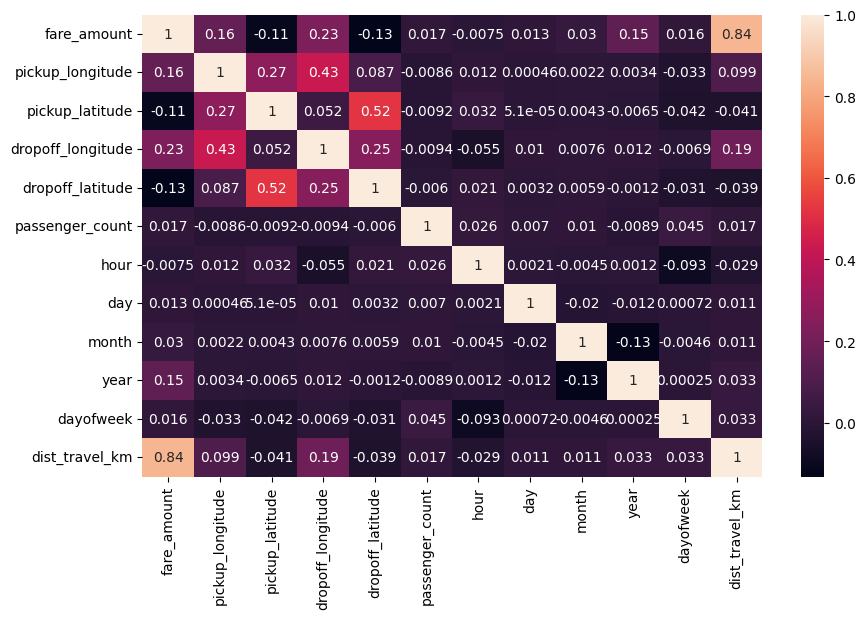

In [90]:
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(),annot = True)  # 1 means highly correlated, 0 means no correlation

In [91]:
#4. Implement linear regression and random forest regression models.

In [92]:
# Dividing the dataset into feature and target values
df_x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]
df_y = df['fare_amount']

In [93]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=1)

In [94]:
#Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# Train the model with our training data
lr.fit(x_train, y_train)
print("Training set score: {:.2f}".format(lr.score(x_train, y_train)))
print("Test set score: {:.7f}".format(lr.score(x_test, y_test)))

Training set score: 0.75
Test set score: 0.7433103


In [95]:
y_pred = lr.predict(x_test)
print(y_pred)


[10.48069417  7.75911616  7.96340385 ...  6.13253365  6.26333121
  4.82464961]


In [96]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 1.8734558495657316
Mean Squared Error: 8.110748537889135
Root Mean Squared Error: 2.847937593749051
R Squared (R²): 0.8621544449377927


In [97]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

#Here n_estimators means number of trees you want to build before making the prediction
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestRegressor()

In [98]:
y_pred_rf = rf.predict(x_test)
print(y_pred_rf)

[11.27   6.791  8.535 ...  6.415  6.692  4.032]


In [99]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred_rf)))

Mean Absolute Error: 1.6503425378010081
Mean Squared Error: 6.742941185669334
Root Mean Squared Error: 2.5967173865612203
R Squared (R²): 0.8869040418038738


### **Explanation**



Certainly! Let's go through the code line by line:

```python
# calculate travel distance from latitudes and longitudes
from math import *
```

This line imports the entire `math` module, which provides mathematical functions like `sin`, `cos`, `sqrt`, etc.

```python
def distance_formula(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
```

Here, a function named `distance_formula` is defined. It takes four parameters: `longitude1`, `latitude1`, `longitude2`, and `latitude2`. The function initializes an empty list called `travel_dist`.

```python
    for pos in range(len(longitude1)):
```

This line starts a `for` loop that iterates over the range of the length of the `longitude1` list. The loop will run for each position (`pos`) in the provided longitude and latitude lists.

```python
        lon1, lan1, lon2, lan2 = map(radians, [longitude1[pos], latitude1[pos], longitude2[pos], latitude2[pos]])
```

Here, `map` is used to apply the `radians` function (from the `math` module) to each element of the list `[longitude1[pos], latitude1[pos], longitude2[pos], latitude2[pos]]`. This converts the latitude and longitude values from degrees to radians and assigns them to the variables `lon1`, `lan1`, `lon2`, and `lan2`.

```python
        dist_lon = lon2 - lon1
        dist_lan = lan2 - lan1
```

These lines calculate the differences in longitude (`dist_lon`) and latitude (`dist_lan`) between the two points.

```python
        a = sin(dist_lan/2)**2 + cos(lan1) * cos(lan2) * sin(dist_lon/2)**2
```

This line calculates the intermediate value `a` in the haversine formula using the provided latitude and longitude differences.

```python
        # radius of earth = 6371
        c = 2 * asin(sqrt(a)) * 6371
```

Here, the haversine formula is used to calculate the great-circle distance between the two points on the Earth's surface. The result (`c`) is multiplied by the Earth's radius (6371 km) to get the distance in kilometers.

```python
        travel_dist.append(c)
```

The calculated distance (`c`) is added to the `travel_dist` list for each iteration of the loop.

```python
    return travel_dist
```

Finally, the function returns the list of travel distances for each pair of latitude and longitude points provided as input.

The subsequent code (not shown in the provided snippet) likely applies this function to a DataFrame (`df`) and creates a new column called `'dist_travel_km'` with the calculated travel distances. Certainly! Let's go through the provided code line by line:

```python
# Dividing the dataset into feature and target values
df_x = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month', 'year', 'dayofweek', 'dist_travel_km']]
df_y = df['fare_amount']
```

Here, the original DataFrame `df` is divided into two parts. `df_x` contains the features (independent variables) for the machine learning model, and it includes columns such as pickup and dropoff coordinates, passenger count, hour, day, month, year, day of the week, and the calculated travel distance. `df_y` contains the target variable (dependent variable) which is the 'fare_amount'.

```python
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=1)
```

This line uses the `train_test_split` function from the scikit-learn library to split the dataset into training and testing sets. `df_x` and `df_y` are split into `x_train`, `x_test`, `y_train`, and `y_test`. The `test_size` parameter specifies the proportion of the dataset to include in the test split (here, 20%), and `random_state` ensures reproducibility.

```python
# Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# Train the model with our training data
lr.fit(x_train, y_train)
```

These lines import the Linear Regression model from scikit-learn, create an instance of it (`lr`), and then train the model using the `fit` method with the training data (`x_train`, `y_train`).

```python
print("Training set score: {:.2f}".format(lr.score(x_train, y_train)))
print("Test set score: {:.7f}".format(lr.score(x_test, y_test)))
```

These lines print the R-squared scores for the training and testing sets. R-squared is a measure of how well the linear regression model fits the data, with a higher score indicating a better fit. The scores range from 0 to 1, where 1 indicates a perfect fit.

```python
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Here n_estimators means the number of trees you want to build before making the prediction
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
```

These lines import the Random Forest Regressor model from scikit-learn, create an instance of it (`rf`), and then train the model using the `fit` method with the training data (`x_train`, `y_train`). The `n_estimators` parameter specifies the number of trees in the forest.

The provided code demonstrates the training of two regression models (Linear Regression and Random Forest Regression) on the given dataset. The performance of these models is evaluated using R-squared scores on both the training and testing sets.              Certainly! Let's delve into the concepts of Linear Regression and Random Forest Regression:

### Linear Regression:
Linear Regression is a supervised machine learning algorithm used for predicting a continuous outcome variable (dependent variable) based on one or more predictor variables (independent variables). It assumes a linear relationship between the input variables and the output.

#### Key Points:
1. **Model Representation:** The model assumes a linear relationship and is represented by the equation:
   \[ y = b_0 + b_1 \cdot x_1 + b_2 \cdot x_2 + \ldots + b_n \cdot x_n \]
   Here, \( y \) is the predicted output, \( b_0 \) is the intercept, \( b_1, b_2, \ldots, b_n \) are the coefficients, and \( x_1, x_2, \ldots, x_n \) are the input features.

2. **Training:** The model is trained by finding the coefficients that minimize the difference between the predicted and actual values. This is often done using the method of least squares.

3. **Strengths:** Simple and interpretable, easy to implement, and provides insights into the relationships between variables.

4. **Weaknesses:** Assumes a linear relationship, sensitive to outliers.

### Random Forest Regression:
Random Forest is an ensemble learning method used for both classification and regression tasks. It builds multiple decision trees during training and merges their predictions to obtain a more accurate and stable prediction.

#### Key Points:
1. **Ensemble Learning:** Random Forest is an ensemble of decision trees. Each tree is trained independently, and their predictions are averaged or voted to make the final prediction.

2. **Decision Trees:** The base model used in a Random Forest is typically a decision tree. Decision trees split the dataset based on features to create a tree-like structure for making predictions.

3. **Randomization:** The "random" in Random Forest comes from the random selection of features and data points during the training of each tree. This helps in creating diverse trees, reducing overfitting.

4. **Strengths:** Robust to overfitting, handles non-linear relationships well, can handle missing values, and provides feature importance.

5. **Weaknesses:** Can be computationally expensive, harder to interpret compared to a single decision tree.

### Comparison:
- Linear Regression assumes a linear relationship between variables, while Random Forest Regression can capture non-linear relationships.
- Linear Regression is simpler and interpretable, but it may struggle with complex relationships. Random Forest is more flexible but can be harder to interpret.
- Linear Regression may perform well when the relationship is indeed linear, while Random Forest can handle a broader range of relationships.

In summary, the choice between Linear Regression and Random Forest depends on the nature of the data and the complexity of the underlying relationships. Linear Regression is a good starting point for simple, linear relationships, while Random Forest can be a powerful choice for more complex, non-linear relationships with multiple features.